### Project idea - Fake news spreads like a wildfire and this is a big issue in this era. We can learn how to distinguish fake news from a real one. We can use supervised learning to implement a model like this.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import warnings #needed for this type of classifier
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
#Read the data
df=pd.read_csv('news.csv')

#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=42)

### What is a TfidfVectorizer?
TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

https://www.geeksforgeeks.org/sklearn-feature-extraction-with-tf-idf/

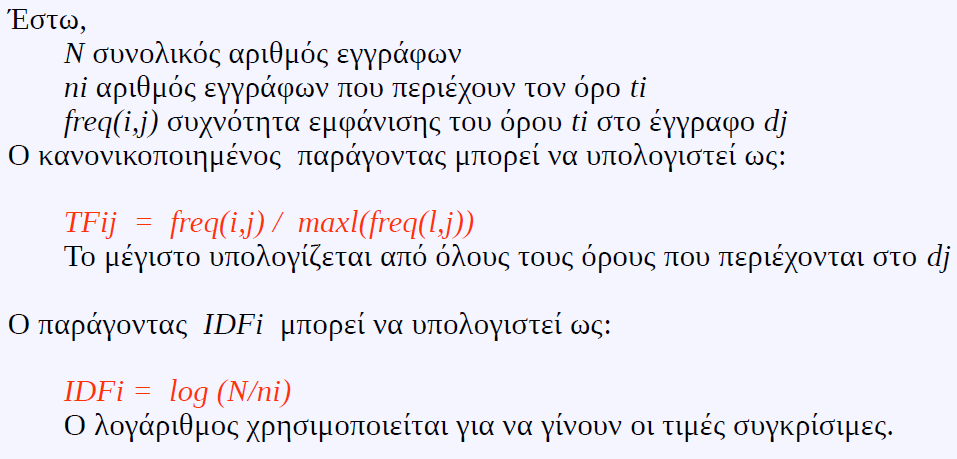

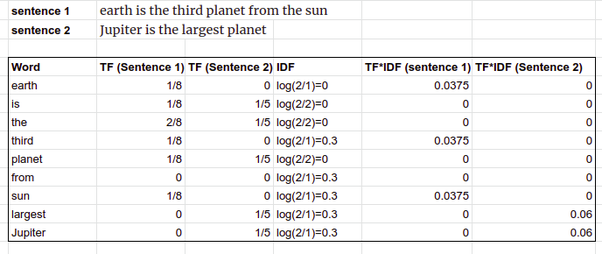

Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [ ]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### What is a PassiveAggressiveClassifier?
Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

https://www.geeksforgeeks.org/passive-aggressive-classifiers/

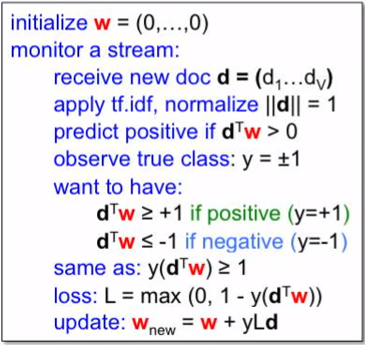

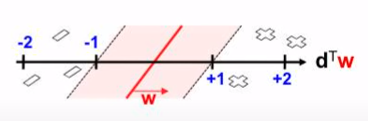

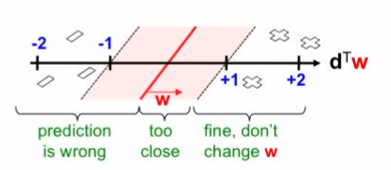

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

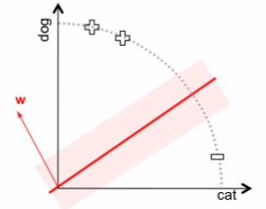

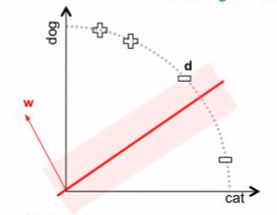

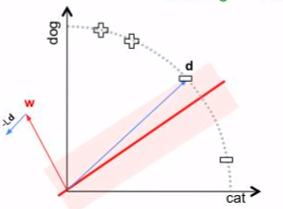

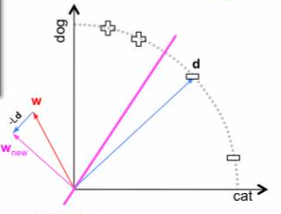

### Classification: True vs. False and Positive vs. Negative
A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a **true negative** is an outcome where the model correctly predicts the negative class.

A **false positive** is an outcome where the model incorrectly predicts the positive class. And a **false negative** is an outcome where the model incorrectly predicts the negative class.


##### accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.

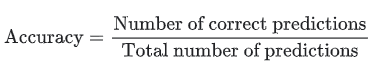

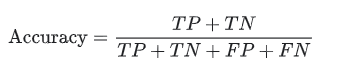

##### precision
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

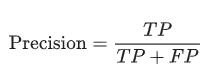

##### recall
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

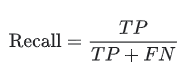

##### f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

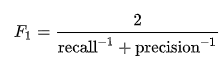

##### support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [ ]:
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.05%


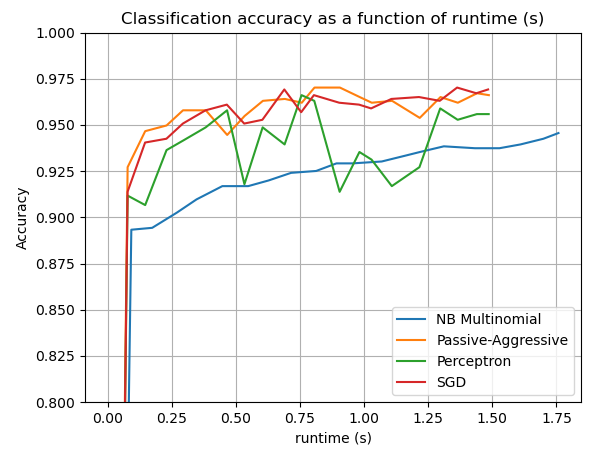

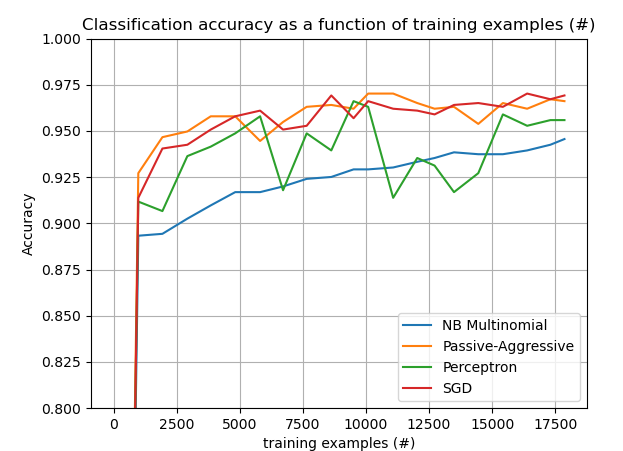

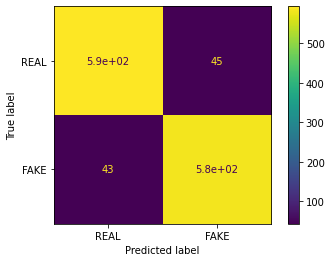

In [ ]:
#Build and plot confusion matrix
plot_confusion_matrix(pac, tfidf_test, y_test, labels=['REAL','FAKE'])

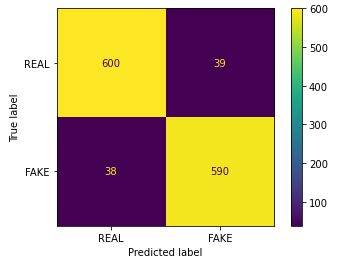

0.936069455406472

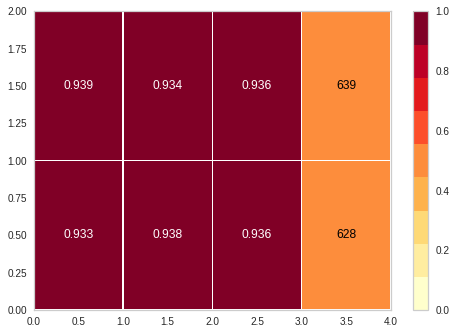

In [ ]:
from yellowbrick.classifier import ClassificationReport

classes = ["FAKE", "REAL"]
visualizer = ClassificationReport(pac, classes=classes, support=True)

visualizer.fit(tfidf_train, y_train)        # Fit the visualizer and the model
visualizer.score(tfidf_test, y_test)        # Evaluate the model on the test data

# precision, recall, f1, support

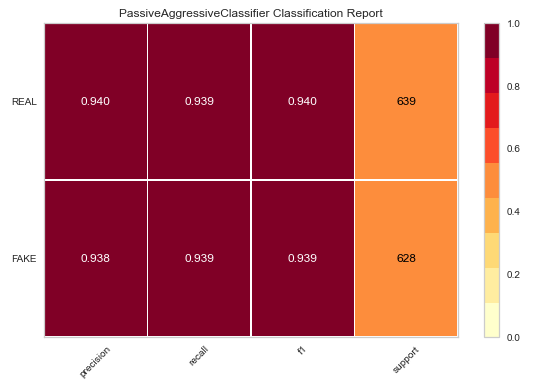

### Sources

#### Project: 

https://data-flair.training/blogs/machine-learning-project-ideas/

#### PassiveAggressive Classification:

https://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf

https://www.youtube.com/watch?v=TJU8NfDdqNQ

https://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py

#### Classification Report: 

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

https://developers.google.com/machine-learning/crash-course/classification/video-lecture

https://tomaxent.com/2018/04/27/Micro-and-Macro-average-of-Precision-Recall-and-F-Score/

https://blog.clairvoyantsoft.com/churning-the-confusion-out-of-the-confusion-matrix-b74fb806e66
